<a href="https://colab.research.google.com/github/Andrei198203/Data_Science_HW_2/blob/main/Hw2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Зчитуємо таблицю
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
tables = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")
df = tables[0]


Task1

In [ ]:
# Print the first lines of the table
df = tables[0]  # select the desired table (index 1)
print("The first rows of the table:")
print(df.head())

The first rows of the table:
             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


Task2

In [ ]:
# Determine the number of rows and columns
print("The number of rows and columns:", df.shape)

The number of rows and columns: (28, 9)


Task3

In [ ]:
# Replace the value "-" in the table with the value NaN
df.replace("—", pd.NA, inplace=True)

Task4

In [ ]:
print("Column types:")
print(df.dtypes)

Column types:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


Task5

In [ ]:
# Change non-numeric column types to numeric
non_numeric_columns = df.columns[df.dtypes == object]
df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors="coerce")

Task6

In [ ]:
# Calculate the proportion of blanks in each column
missing_percentage = df.isnull().sum() / len(df) * 100
print("The proportion of spaces in each column:")
print(missing_percentage)

The proportion of spaces in each column:
Регіон    100.000000
1950        7.142857
1960        3.571429
1970        3.571429
1990        0.000000
2000        0.000000
2012        0.000000
2014        7.142857
2019       14.285714
dtype: float64


Task7

In [ ]:
# Delete data for the whole country (last row of the table)
df.drop(df.tail(0).index, inplace=True)

Task8

In [ ]:
# Replace missing data in columns with average values
df.fillna(df.mean(), inplace=True)

Task9

In [ ]:
# Obtain a list of regions with a birth rate in 2019 above the national average
average_birth_rate_ukraine = df['2019'].mean()
regions_above_average_2019 = df[df['2019'] > average_birth_rate_ukraine]['Регіон']
print("Регіони з народжуваністю у 2019 році вище середньої по Україні:")
print(regions_above_average_2019)

Регіони з народжуваністю у 2019 році вище середньої по Україні:
2    NaN
6    NaN
8    NaN
12   NaN
14   NaN
16   NaN
20   NaN
23   NaN
25   NaN
Name: Регіон, dtype: float64


Task10

In [ ]:
# Find the region with the highest birth rate in 2014
region_with_highest_birth_rate_2014 = df[df['2014'] == df['2014'].max()]['Регіон'].values[0]
print("The region with the highest birth rate in 2014:", region_with_highest_birth_rate_2014)



The region with the highest birth rate in 2014: Крим


Task11

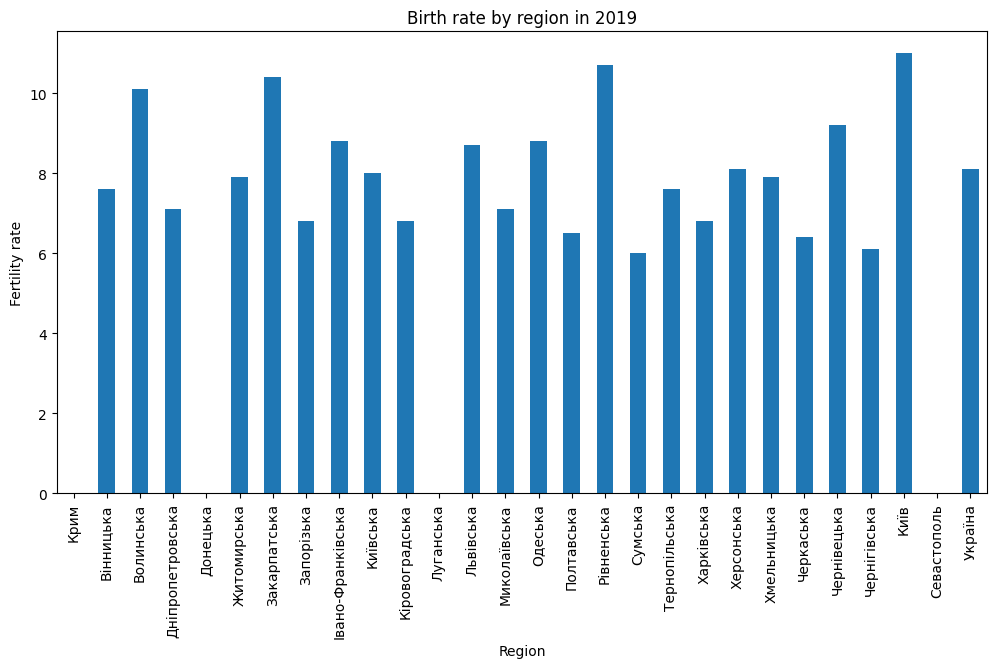

In [12]:
# Plotting a bar chart of the birth rate by region in 2019
%matplotlib inline
df['2019'] = pd.to_numeric(df['2019'], errors='coerce')
df.plot(kind='bar', x='Регіон', y='2019', figsize=(12, 6), legend=None)
plt.title('Birth rate by region in 2019')
plt.xlabel('Region')
plt.ylabel('Fertility rate')
plt.xticks(rotation=90)
plt.show()

Task12(Visualisation)

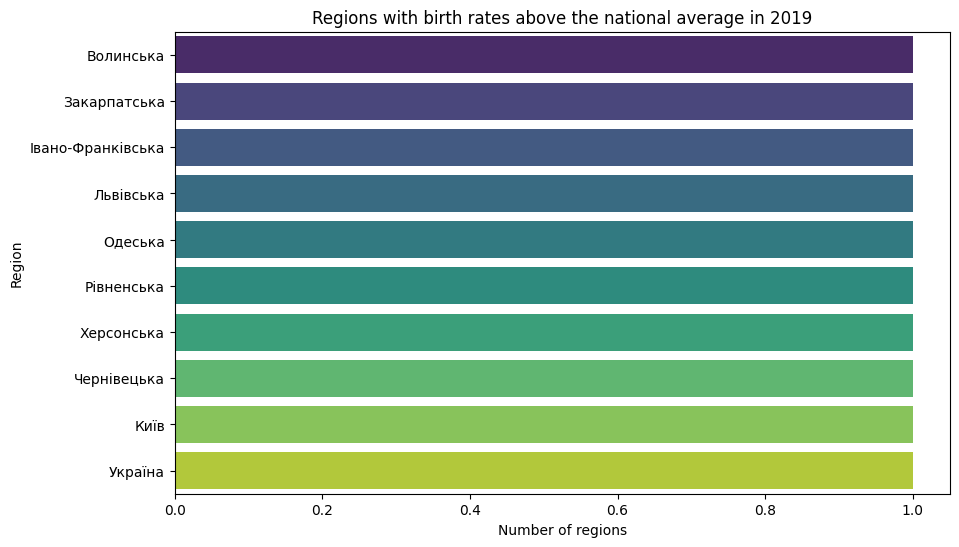

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Reading the data
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
tables = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")
df = tables[0]

# Replacing the "-" with NaN
df.replace('—', np.nan, inplace=True)

# Calculating the average value
average_birth_rate_ukraine = df['2019'].astype(float).mean()

# Obtaining a list of regions with fertility rates above the national average in 2019
df['2019'] = pd.to_numeric(df['2019'], errors='coerce')
average_birth_rate_ukraine = df['2019'].mean()
regions_above_average_2019 = df[df['2019'] > average_birth_rate_ukraine]['Регіон']

#Building a chart
plt.figure(figsize=(10, 6))
sns.countplot(y=regions_above_average_2019, hue=regions_above_average_2019, palette='viridis', legend=False)
plt.title('Regions with birth rates above the national average in 2019')
plt.xlabel('Number of regions')
plt.ylabel('Region')
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
tables = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")
df = tables[0]



# Selecting regions for charting
regions = df['Регіон']

# Replacing the "-" with NaN
df.replace('—', np.nan, inplace=True)

# Convert to float type
data = df.drop(columns=['Регіон']).astype(float)

# Selection of data for charting (from 1950 to 2019)
data = df.drop(columns=['Регіон']).astype(float)

# Building a chart
plt.figure(figsize=(12, 8))
for region in regions:
    plt.plot(data.columns, data.loc[df['Регіон'] == region].values.flatten(), marker='o', label=region)

# Add titles and labels
plt.title('Dynamics of the fertility rate by years in different regions of Ukraine')
plt.xlabel('Year')
plt.ylabel('Fertility rate')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

# Graph display
plt.show()